# Чому повнозв'язні шари не є універсальним рішенням?

- **Обробка великих об'ємів даних**

При великому обсязі даних повнозв'язні шари можуть стати обмежуючим фактором через високу обчислювальну складність і вимоги до пам'яті

- **Складні в описі**

Не можливо аналізувати що саме робить кожен шар і яку інформацію він витягую.

## Приклад. Растрова графіка

**Піксель (або піксельне значення)** визначається як найменша одиниця растрового зображення. Кожен піксель має деякі характеристики, які можуть бути використані для подальшого аналізу та обробки зображень. Основні характеристики пікселя включають:

- **Яскравість (інтенсивність):** Це числове значення, яке відображає яскравість або інтенсивність кольору пікселя. Зазвичай це значення знаходиться в діапазоні від 0 до 255 для чорно-білих зображень або в діапазоні від 0 до 1 для зображень у форматі RGB.

- **Колір (RGB):** Для кольорових зображень, піксель має тривимірний вектор, що відображає його кольорові компоненти червоний (R), зелений (G) і синій (B). Кожна компонента зазвичай представлена числовим значенням в діапазоні від 0 до 255.

- **Координати:** Координати пікселя вказують на його місце в растровому зображенні. Зазвичай це дві координати (x, y) на площині зображення.

- **Прозорість (альфа-канал):** У деяких форматах зображень може бути присутній альфа-канал, який відображає рівень прозорості пікселя. Це важливо для роботи з прозорими зображеннями або зображеннями з альфа-каналом, такими як PNG.

![alt text](https://upload.wikimedia.org/wikipedia/commons/3/3b/Rgb-raster-image.svg)

Картинка MNIST

У наборі даних MNIST кожне зображення вже представлене у векторній формі, де кожен піксель розглядається як один елемент цього вектору.

**Тобто кожен піксель зображення MNIST можна розглядати як один елемент вектора,**


а весь набір даних представляє собою матрицю, де кожен рядок відповідає одному зображенню, а кожен стовпчик - значенням пікселя.

Наприклад, у наборі даних MNIST зображення мають розмірність 28x28 пікселів, і кожен піксель може бути представлений значенням яскравості від 0 до 255. Таким чином, кожен рядок матриці представляє 28*28=784 значення пікселів.

Отже, кожен зразок в наборі даних MNIST може бути представлений як вектор з 784 елементів, і весь набір даних MNIST можна розглядати як матрицю, де кожен рядок є вектором опису конкретного зображення.






![alt text](https://user-images.githubusercontent.com/51207580/59979373-bc052480-9604-11e9-85b8-464367fdc891.png)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Завантаження набору даних MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Побудова моделі з використанням тільки Dense шарів
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


А якщо взяти картинку вискою якості?

![alt text](https://images.pexels.com/photos/884788/pexels-photo-884788.jpeg?auto=compress&cs=tinysrgb&w=600)

**Full HD (Full High Definition)** 1920x1080

(1920*1080) * 256 + 256 = 530 841 856

![alt text](https://crevisio.com/images/posts/301/jMSgIo/Crevisio-301-jMSgIo-o.jpg)


**4k (Ultra High Definition)** 4096x2160

(4096*2160) * 256 + 256 = 2 264 924 416

Згорткові НМ наш вибір!

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Завантаження набору даних MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Побудова моделі з використанням тільки Dense шарів
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [3]:
200960 - (320 + 36928 + 147712)

16000

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Завантаження та підготовка даних MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Створення моделі
model = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 8)           296       
                                                                 
 flatten_2 (Flatten)         (None, 72)               

In [5]:
# Компіляція та навчання моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,
          epochs=5,
          batch_size=64,
          validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 18s 17ms/step - loss: 0.7099 - accuracy: 0.7613 - val_loss: 0.2456 - val_accuracy: 0.9251
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.2204 - accuracy: 0.9326 - val_loss: 0.1612 - val_accuracy: 0.9525
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.1651 - accuracy: 0.9491 - val_loss: 0.1228 - val_accuracy: 0.9623
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.1379 - accuracy: 0.9571 - val_loss: 0.1120 - val_accuracy: 0.9654
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.1241 - accuracy: 0.9611 - val_loss: 0.1298 - val_accuracy: 0.9600


1/1 [==============================] - 0s 120ms/step


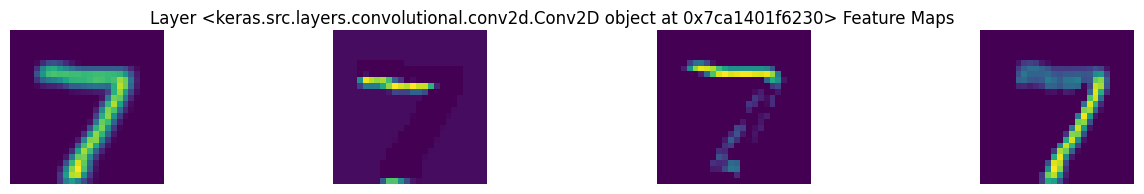

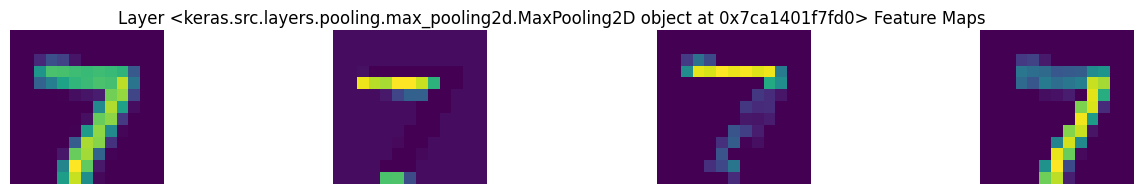

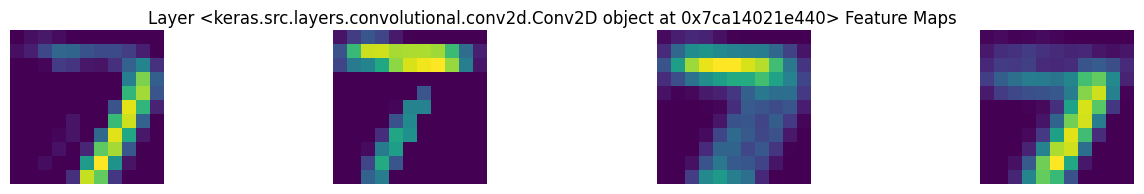

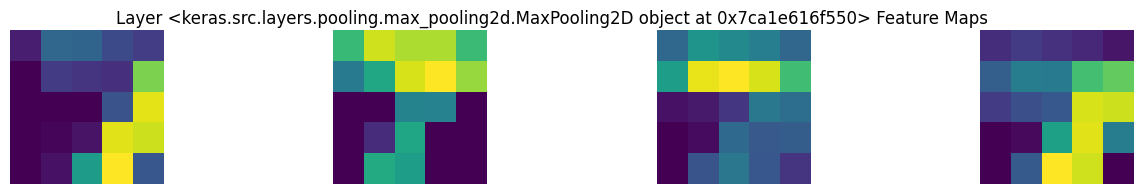

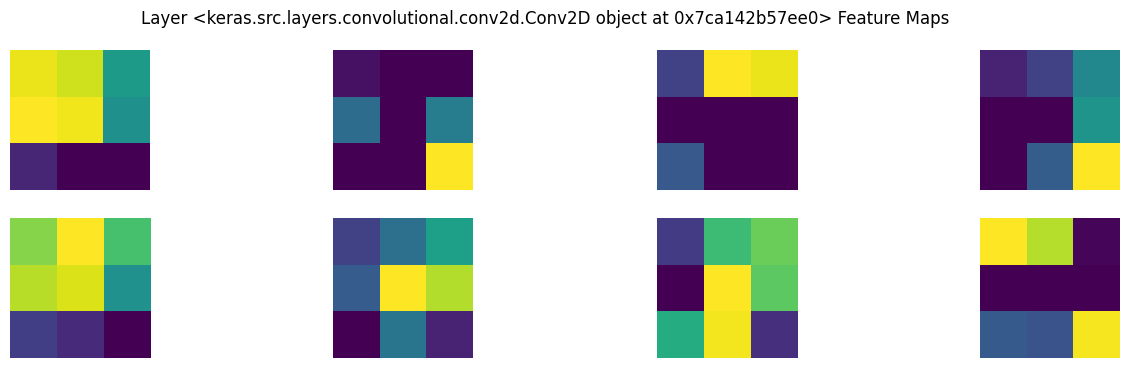

In [6]:
# Передача вхідного зображення через модель та отримання feature maps для кожного шару
activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))

# Візуалізація feature maps для кожного шару
for layer_index, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:  # Якщо це згортковий шар
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        rows = num_features // 4  # Змінено з 8 на 4, оскільки менше фільтрів
        cols = 4

        plt.figure(figsize=(16, 2 * rows))
        for i in range(num_features):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Layer {activation_model.layers[layer_index+1]} Feature Maps')
        plt.show()

# Згорткові нейронні мережі

**Згорткові нейронні мережі (Convolutional Neural Networks або CNNs)** - це тип нейронних мереж, які спеціально розроблені для обробки зображень і роботи з даними, які мають локальну просторову структуру, таку як зображення.

Основна ідея застосування згорткових нейронних мереж полягає в тому, щоб вони автоматично вивчали корисні ознаки зображень, а не вимагали ручного введення ознак. Вони досягають цього за допомогою двох основних компонентів: згорткових шарів і пулінгу.

- **Згорткові шари (Convolutional Layers):**

 - У згорткових шарах використовуються фільтри або ядра, які скользять (згортаються) по вхідному зображенню для виявлення різних ознак, таких як різні текстури, грані, кути тощо.
 - Кожен фільтр генерує нову функціональну карту ознак, яка представляє просторові властивості вхідного зображення, які відповідають конкретній ознаці
 - Через навчання мережі, фільтри автоматично вивчаються так, щоб вони ефективно виявляли важливі ознаки для вирішення конкретної задачі, наприклад, класифікації зображень.
- **Пулінг (Pooling):**

 - Пулінгові шари використовуються для зменшення просторових розмірностей функціональних карт ознак, зменшення обчислювальних витрат та запобігання перенавчанню.
 - Найпоширеніша операція пулінгу - максимальне пулювання (Max Pooling), де вікно скользить по функціональній карті ознак і вибирає максимальне значення з кожного вікна.
 - Після пулінгу розмірність функціональних карт ознак зменшується, але вони все ще зберігають важливі просторові властивості.


Ці два компоненти (згорткові шари та пулінг) повторюються у згорткових нейронних мережах кілька разів для поступового виявлення ієрархічних ознак зображення. На виході від останнього згорткового шару отримується набір високорівневих функціональних карт ознак, які подаються на повнозв'язні шари для класифікації або регресії.

![alt text](https://miro.medium.com/v2/resize:fit:1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

## Convolution layer

**Згорткові шари (Convolutional Layers)** є ключовим елементом згорткових нейронних мереж (Convolutional Neural Networks або CNNs) і використовуються для ефективного виявлення та витягування ознак зображень. Вони відіграють важливу роль у розв'язанні завдань комп'ютерного зору, таких як класифікація зображень, виявлення об'єктів, визначення зон інтересу тощо. Ось кілька ключових аспектів згорткових шарів:
- **Фільтри (Kernels):**

 - Згортковий шар використовує набір фільтрів (ядер), які представляють собою маленькі матриці ваг.
 - Кожен фільтр представляє собою шаблон, який шукає певну ознаку в зображенні, таку як грань, кут або текстура.
 - Розмір фільтра може бути різним, зазвичай він складає 3x3 або 5x5, але може бути і більшим для складних завдань.
- **Згортка (Convolution):**

 - Фільтр скользить по вхідному зображенню, застосовуючи операцію згортки.
 - Операція згортки полягає у множенні відповідних значень пікселів вхідного зображення на ваги фільтра та підсумовуванні результатів.
 - Результат згортки є новою функціональною картою ознак, яка відображає відповідність ознак на вхідному зображенні.
- **Стрид (Stride):**

 - Стрид визначає, наскільки великим кроком переміщається фільтр під час згортки.
 - Зазвичай використовується стрид 1, що означає, що фільтр переміщується піксель за пікселем.
 - Використання стріду більшого за 1 зменшує розмір функціональних карт ознак після згортки.
- **Заповнення (Padding):**

 - Для збереження просторових розмірів зображення після згортки можна використовувати заповнення, де додаткові пікселі додаються до вхідного зображення по краях.
 - Зазвичай використовується "заповнення нулями" (zero-padding), де додаткові пікселі заповнюються нулями.
 - Загалом, згорткові шари дозволяють згортковим нейронним мережам автоматично виявляти та витягувати важл

![alt text](https://anhreynolds.com/img/cnn.png)

![alt text](https://miro.medium.com/v2/resize:fit:1070/1*FHjn4GWkS1JNkBqX2wVEmg.gif)

### Dimension types

1. 1D.

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*-hYGWjdLF_RuWO4OcrFd-g.png)

2. 2D.

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*JFJtXP5ukd9T2JnZCcIrcQ.png)

3. 3D.

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*fnkPPcqdWOtgg0ewoEfr9g.png)

А як тоді працювати з кольоровими картинками?


![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*p3lNAf3SI8I5O-2fzj2Tqw.png)

А якщо фільтрів багато?


![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*DmAwcMCcHqZdF62J0hNWlQ.png)

### Ядра (фільтри)


Є кілька типів згорткових фільтрів, які можуть бути використані в згорткових шарах нейронних мереж:

- **Горизонтальні згорткові фільтри**: Ці фільтри допомагають виявити горизонтальні структури або ознаки у вхідних зображеннях, такі як горизонтальні лінії, краї об'єктів або текстури.

\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1 \\
\end{bmatrix}


- **Вертикальні згорткові фільтри**: Ці фільтри призначені для виявлення вертикальних структур або ознак у вхідних зображеннях, таких як вертикальні лінії, краї об'єктів або текстури.


\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}


- **Діагональні згорткові фільтри**: Ці фільтри можуть бути налаштовані для виявлення діагональних ознак або структур у вхідних зображеннях.

\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}


- **Фільтри Габора**: Ці фільтри, які базуються на функціях Габора, можуть бути використані для виявлення різних текстур у зображеннях, таких як штрихи, точки, хвилі і т. д.

Фільтри Габора мають ядро, яке включає два компоненти: гаусіан та синусоїдальну хвилю. Гаусіан фільтрує вміст в діапазоні просторових частот, тоді як синусоїдальна хвиля допомагає виявляти структури на зображенні. Це дозволяє фільтрам Габора виявляти текстурні особливості зображення, такі як лінії, краї, кінці, кути, та інші.

\begin{bmatrix}
0.00088363 & 0.00254254 & 0.00088363 \\
0.00254254 & 0.00610245 & 0.00254254 \\
0.00088363 & 0.00254254 & 0.00088363 \\
\end{bmatrix}


- **Фільтри Собеля**: Ці фільтри широко використовуються для виявлення країв у зображеннях, шляхом виділення змін яскравості між сусідніми пікселями у горизонтальному та вертикальному напрямках.

https://uk.wikipedia.org/wiki/Оператор_Собеля

\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}

- **Фільтри розмиття (Blurring Filters)**: Вони використовуються для зменшення деталей у зображеннях та згладжування шуму. Наприклад, фільтр Гауса чи фільтр розмиття з ядром:

\begin{bmatrix}
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 \\
\end{bmatrix}


Якщо ваги ядра не задани(фільтр), тоді модель з вони зазвичай ініціалізуються автоматично під час створення моделі. Це може включати випадкове ініціалізування, наприклад, випадкове розподілення з нульовим середнім або використання якихось попередньо навчених значень, якщо вони доступні.

У випадку згорткових шарів, ядра зазвичай ініціалізуються випадково. Наприклад, для ядер розміром 3x3 значення можуть бути випадковими числами, що беруться з певного розподілу, такого як нормальний або рівномірний розподіл. Таке випадкове ініціалізування дозволяє моделі вчитися з нуля і адаптувати ваги ядер до конкретного завдання під час процесу навчання. Що дозволяє на кожній епосі знаходити більш впливові елементи, і будувати свої фільтри.




![alt text](https://miro.medium.com/v2/resize:fit:2000/0*VvbyjCaz7Qq3G4yF)

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*70pr9Bt_GI6KmWe4sw7UBA.jpeg)

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*0JOkCYPP8dM-6OIZwseMgg.png)

Convolution Filters: https://medium.com/@ianormy/convolution-filters-4971820e851f

Image Convolution Filtering: https://medium.com/@timothy_terati/image-convolution-filtering-a54dce7c786b

Exploring Feature Extraction with CNNs: https://towardsdatascience.com/exploring-feature-extraction-with-cnns-345125cefc9a

### Padding and strides


**Padding і strides** - це два параметри, які використовуються у згорткових шарах нейронних мереж. Ось їх визначення та вплив на згорткові операції:

**Padding (заповнення):**

- Padding використовується для контролю розміру виходу згорткового шару відносно розміру вхідного зображення.
- Він вказується у параметрах згорткового шару і може бути "valid" або "same".
- "Valid" (за замовчуванням) означає відсутність заповнення (padding), тобто згортка виконується тільки там, де можна повністю охопити вхідне зображення.
- "Same" вказує, щоб виходи згорткового шару мали той же розмір, що і вхідні дані, за рахунок автоматичного додавання заповнення до зображення з обох сторін, якщо необхідно, щоб розмір згорткового виходу був такий самий, як і розмір вхідного зображення.

![alt text](https://www.researchgate.net/publication/332463100/figure/fig1/AS:748521619718145@1555472869815/An-illustration-of-padding-and-convolution-operations-in-the-CNN-model-Suppose-that-the.ppm)

**Strides (кроки):**

- Strides визначають кількість пікселів, на яку фільтр згортки зсувається по вхідному зображенню кожного разу.
Якщо strides = 1 (за замовчуванням), фільтр згортки зсувається на один піксель за кожну згортку.
- Зменшення значення strides призводить до зменшення розміру виходу згорткового шару, оскільки фільтр згортки рухається повільніше.
- Збільшення strides може призвести до зменшення часу обчислення, але може призвести до втрати інформації.

![alt text](https://www.researchgate.net/publication/340500073/figure/fig3/AS:877888291233794@1586316287772/Example-of-a-square-image-convolution-with-zero-padding-While-training-a-CNN-there-are.png)

Якщо врахувати всі ці речі, тоді розмірність матриці після операції згортки буде

[$\frac{(n_x + 2\cdot p - f_x+1)}{s + 1}$ x $\frac{n_y+ 2\cdot p - f_y+1}{s + 1}$]



[$n_x$ x $n_y$] - розмірність початкової матриці,

[$f_x$ x $f_y$] - розмірність фільтр матриці,

*s* - крок згортки (stride),

*p* - заповнення (padding)





### Tensorflow realisation

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv3D

In [16]:
from tensorflow.keras import Input, layers, Model

# 1d
input_data = Input([100, 1])
conv = layers.Conv1D(
    2, # два фільтра згортки
    3, # фільтр згортки розміром 3
    use_bias=False,
    # padding = 'same'
    )(input_data) # використовуємо до вхідних даних
model = Model(inputs=[input_data], outputs=conv)

# Переглядаємо структуру моделі
model.summary()

# 100 + (2 * 0) - 3 + 1 / (0+1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 98, 2)             6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras import Input, layers, Model

# 2d
input_data = Input([28, 28, 1])
conv = layers.Conv2D(
    2, # два фільтра згортки
    (3,3), # фільтр згортки розміром 3
    use_bias=False,
    padding = 'same',
    )(input_data) # використовуємо до вхідних даних
model = Model(inputs=[input_data], outputs=conv)

# Переглядаємо структуру моделі
model.summary()

# 28 + (2 * 1) - 3 + 1 / (0 + 1)  х   28 + (2 * 1) - 3 + 1 / (0 + 1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 2)         18        
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from tensorflow.keras import Input, layers, Model

# 2d (RGB)
input_data = Input([28, 28, 3])
conv = layers.Conv2D(
    2, # два фільтра згортки
    (3,3), # фільтр згортки розміром 3
    use_bias=False,
    # padding = 'same'
    )(input_data) # використовуємо до вхідних даних
model = Model(inputs=[input_data], outputs=conv)

# Переглядаємо структуру моделі
model.summary()

# 28 + (2 * 0) - 3 + 1 / (0 + 1)  х   28 + (2 * 0) - 3 + 1 / (0 + 1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 2)         54        
                                                                 
Total params: 54 (216.00 Byte)
Trainable params: 54 (216.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from tensorflow.keras import Input, layers, Model

# 3d
input_data = Input([32, 32, 32, 3]) # наприклад, для відео з 32x32 кадрів та 3 кольоровими каналами RGB
conv = layers.Conv3D(
    2, # два фільтра згортки
    (3, 3, 3), # фільтр згортки розміром 3
    use_bias=False,
    # padding = 'same'
    )(input_data) # використовуємо до вхідних даних
model = Model(inputs=[input_data], outputs=conv)

# Переглядаємо структуру моделі
model.summary()

# 32 + (2 * 0) - 3 + 1 / (0 + 1)  х   32 + (2 * 0) - 3 + 1 / (0 + 1)  х   32 + (2 * 0) - 3 + 1 / (0 + 1)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 32, 3)]   0         
                                                                 
 conv3d (Conv3D)             (None, 30, 30, 30, 2)     162       
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras import Input, layers, Model

# 3d + strides
input_data = Input([32, 32, 32, 3]) # наприклад, для відео з 32x32 кадрів та 3 кольоровими каналами RGB
conv = layers.Conv3D(
    2, # два фільтра згортки
    (3, 3, 3), # фільтр згортки розміром 3
    use_bias=False,
    padding = 'same',
    strides = (2,1,2)
    )(input_data) # використовуємо до вхідних даних
model = Model(inputs=[input_data], outputs=conv)

# Переглядаємо структуру моделі
model.summary()

# 32 + (2 * 1) - 3 + 1 / (1 + 1)  х   32 + (2 * 0) - 3 + 1 / (0 + 1)  х   32 + (2 * 0) - 3 + 1 / (0 + 1)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 32, 3)]   0         
                                                                 
 conv3d_2 (Conv3D)           (None, 16, 32, 16, 2)     162       
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Pooling layer

**Пулінг-шар (Pooling layer)** є одним із типів шарів у згорткових нейронних мережах. Він використовується для зменшення розмірності зображення або відображення шару. Це робиться за допомогою об'єднання (пулінгу) інформації з різних областей зображення в одне значення. Це допомагає зменшити кількість параметрів у мережі і, отже, обчислювальний витрати.

Основна мета пулінг-шару полягає в зменшенні розмірності простору ознак та спрощенні обробки даних, зберігаючи при цьому важливу інформацію. Це досягається за рахунок об'єднання (зазвичай за допомогою максимуму або середнього значення) значень у певних областях зображення, що дозволяє зменшити кількість параметрів і обчислень у мережі, а також зробити її більш устійчивою до змін розташування об'єктів у вхідних даних.

![alt text](https://cdn-images-1.medium.com/max/659/1*ypIfJX7iWX6h6Kbkfq85Kg.png)


При налаштуванні пулінг-шару важливо враховувати кілька ключових моментів:

- **Розмір пулінгу (pool size):** Це розмір області, в якій виконується пулінг. Зазвичай використовуються значення 2x2 або 3x3. Важливо обирати такий розмір, щоб забезпечити достатню агрегацію інформації при зменшенні розмірності.

- **Крок пулінгу (pool stride):** Це кількість пікселів, на які зсувається фільтр під час виконання пулінгу. Зазвичай крок пулінгу дорівнює розміру пулінгу, але іноді використовують інші значення для більшої або меншої агрегації даних.

- **Тип пулінгу (pool type):** Існують різні типи пулінгу, такі як максимальний пулінг (Max Pooling) і середнє пулінг (Average Pooling). Кожен тип має свої особливості і може бути вибраний залежно від конкретної задачі і архітектури мережі.

- **Заповнення (padding):** Використання заповнення (padding) може вплинути на розмір вихідних даних після пулінгу. Варто розглянути, чи потрібне заповнення, і який тип заповнення (наприклад, 'same' або 'valid') найбільш підходить для конкретного завдання.

- **Вибір місця розташування пулінгу:** Хоча зазвичай пулінг виконується після кожного згорткового шару, в деяких випадках можуть виникати альтернативи, наприклад, виконання пулінгу лише після кількох згорткових шарів або з використанням проміжних шарів.

Загалом вибір параметрів пулінгу варіюється залежно від конкретного завдання, архітектури мережі та вимог до швидкодії та точності моделі.

![alt text](https://www.researchgate.net/publication/340812216/figure/fig4/AS:928590380138496@1598404607456/Pooling-layer-operation-oproaches-1-Pooling-layers-For-the-function-of-decreasing-the.png)

Формула розмірності

$\text{output_size = }\frac{n_x + 2\cdot padding - \text{pool size}}{s}+ 1$

### Tensorflow realisation

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling1D
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling3D

-----


https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling1D
https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D
https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling3D

In [23]:
from tensorflow.keras import Input, layers, Model

# 2d
input_data = Input([28, 28, 1])
conv = layers.Conv2D(2, (3,3), use_bias=False, strides=(1, 1), padding='valid')(input_data)
pool = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(conv)
model = Model(inputs=[input_data], outputs=pool)

# Переглядаємо структуру моделі
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 2)         18        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 2)         0         
 g2D)                                                            
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
from tensorflow.keras import Input, layers, Model
# 2d
input_data = Input([28, 28, 1])
conv = layers.Conv2D(2, (3,3), use_bias=False, strides=(1, 1), padding='valid')(input_data)
pool = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(conv)
model = Model(inputs=[input_data], outputs=pool)

# Переглядаємо структуру моделі
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 2)         18        
                                                                 
 average_pooling2d (Average  (None, 13, 13, 2)         0         
 Pooling2D)                                                      
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Example

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


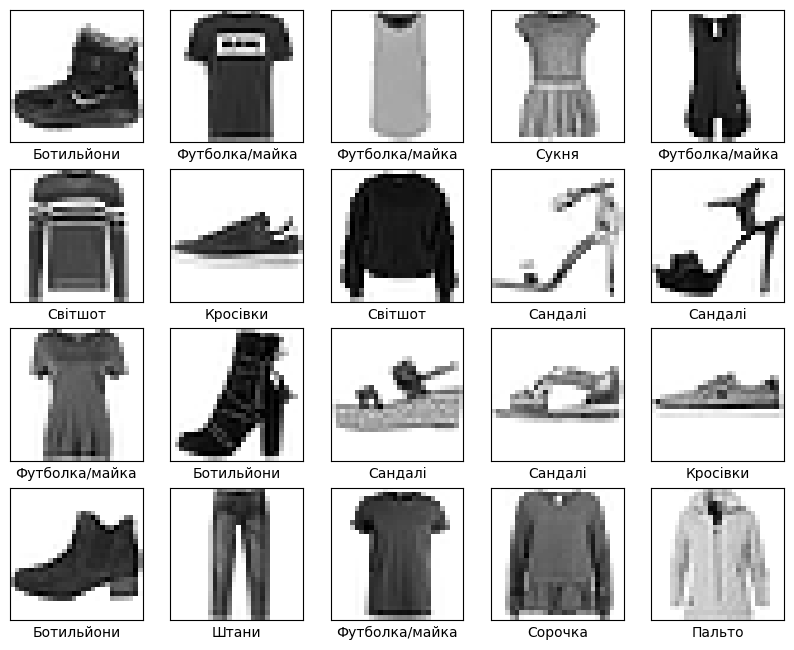

In [26]:
# Створення списку міток класів для використання при відображенні
class_names = ['Футболка/майка', 'Штани', 'Світшот', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Ботильйони']
n_to_plot = 20

plt.figure(figsize=(10,10))
for i in range(n_to_plot):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Fully Connected NN

In [27]:
# Побудова моделі
model_FC = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Вирівнювання вхідних даних
    layers.Dense(128, activation='relu'),  # Повнозв'язний шар з 128 нейронами
    layers.Dense(10, activation='softmax') # Вихідний шар з 10 нейронами (класи)
])

# Компіляція моделі
model_FC.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_FC.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Тренування моделі
model_FC.fit(train_images,
             train_labels,
             epochs=10,
             batch_size=64,
             validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.5433 - accuracy: 0.8127 - val_loss: 0.4324 - val_accuracy: 0.8468
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4006 - accuracy: 0.8589 - val_loss: 0.3859 - val_accuracy: 0.8652
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3610 - accuracy: 0.8704 - val_loss: 0.3604 - val_accuracy: 0.8739
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3332 - accuracy: 0.8799 - val_loss: 0.3554 - val_accuracy: 0.8740
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3139 - accuracy: 0.8854 - val_loss: 0.3327 - val_accuracy: 0.8827
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2974 - accuracy: 0.8913 - val_loss: 0.3444 - val_accuracy: 0.8770
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2834 - accuracy: 0.8952 - val_loss: 0.3441 - val_accuracy: 0.8776
Epoch 

In [29]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model_FC.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8785
Test accuracy: 0.8784999847412109


## Convolution NN

In [30]:
# Побудова моделі
model_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Згортковий шар з 32 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(64, activation='relu'),  # Повнозв'язний шар з 64 нейронами
    layers.Dense(10, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])

# Компіляція моделі
model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_CNN.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [31]:
# Тренування моделі
model_CNN.fit(train_images,
              train_labels,
              epochs=5,
              batch_size=64,
              validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 41s 53ms/step - loss: 0.5804 - accuracy: 0.7889 - val_loss: 0.3996 - val_accuracy: 0.8543
Epoch 2/5
750/750 [==============================] - 38s 51ms/step - loss: 0.3602 - accuracy: 0.8688 - val_loss: 0.3430 - val_accuracy: 0.8776
Epoch 3/5
750/750 [==============================] - 38s 51ms/step - loss: 0.3100 - accuracy: 0.8859 - val_loss: 0.3449 - val_accuracy: 0.8709
Epoch 4/5
750/750 [==============================] - 42s 56ms/step - loss: 0.2807 - accuracy: 0.8966 - val_loss: 0.3050 - val_accuracy: 0.8863
Epoch 5/5
750/750 [==============================] - 37s 50ms/step - loss: 0.2543 - accuracy: 0.9058 - val_loss: 0.2810 - val_accuracy: 0.8965


In [32]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.2955 - accuracy: 0.8928
Test accuracy: 0.892799973487854


1/1 [==============================] - 0s 106ms/step


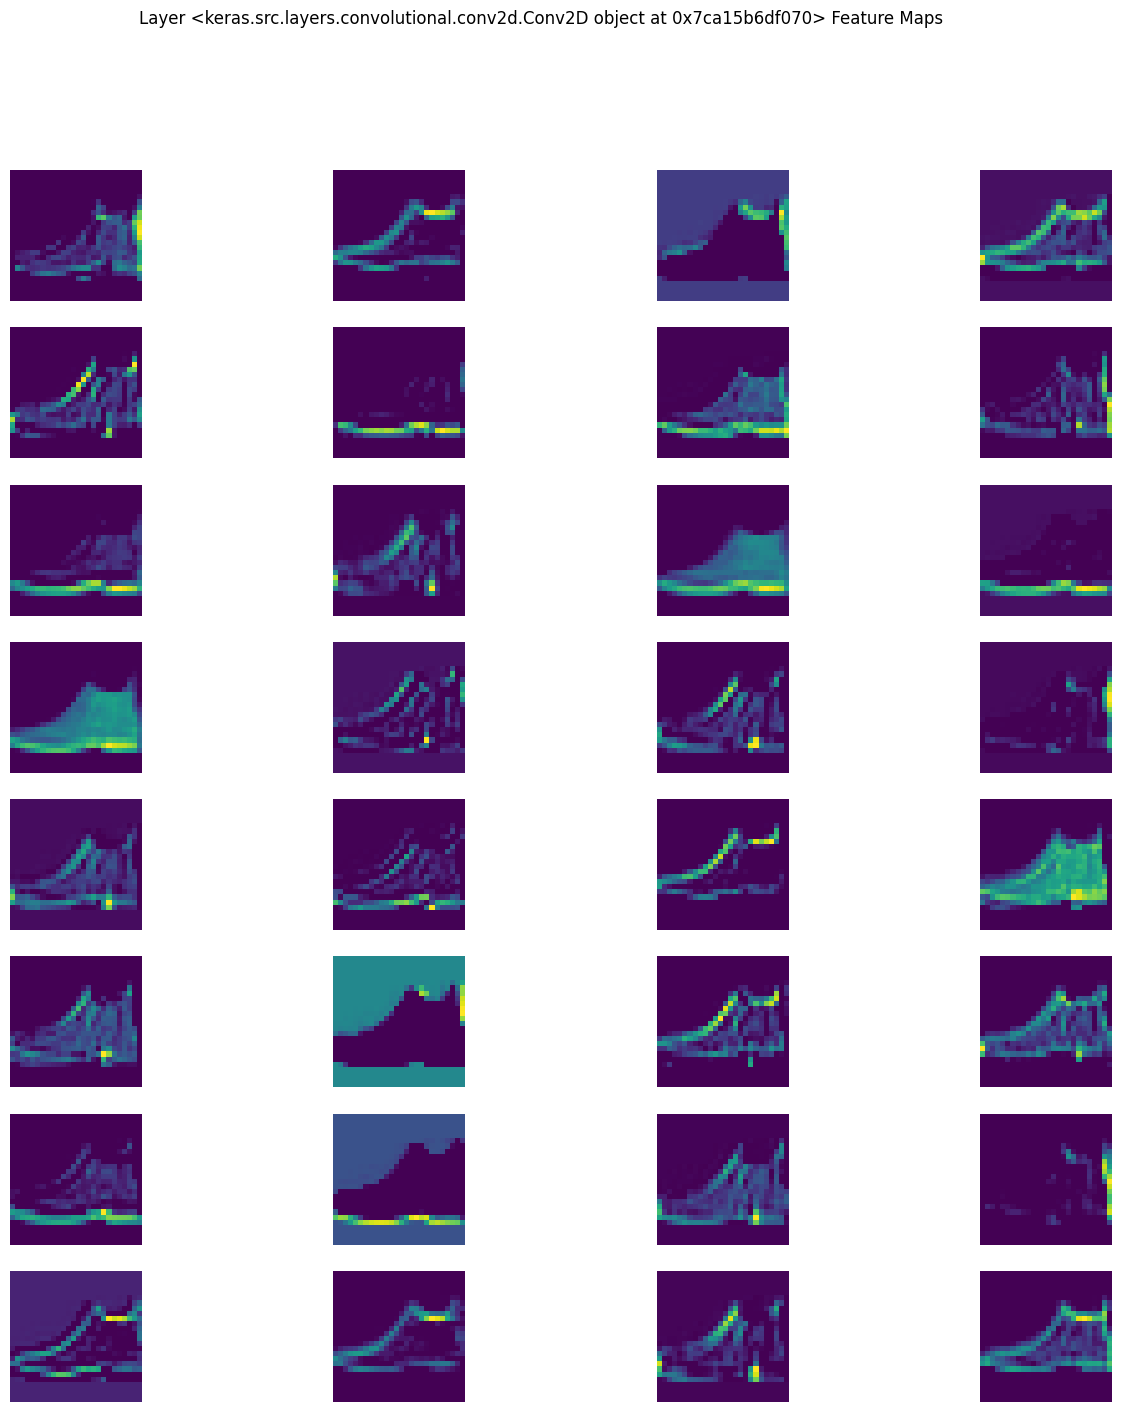

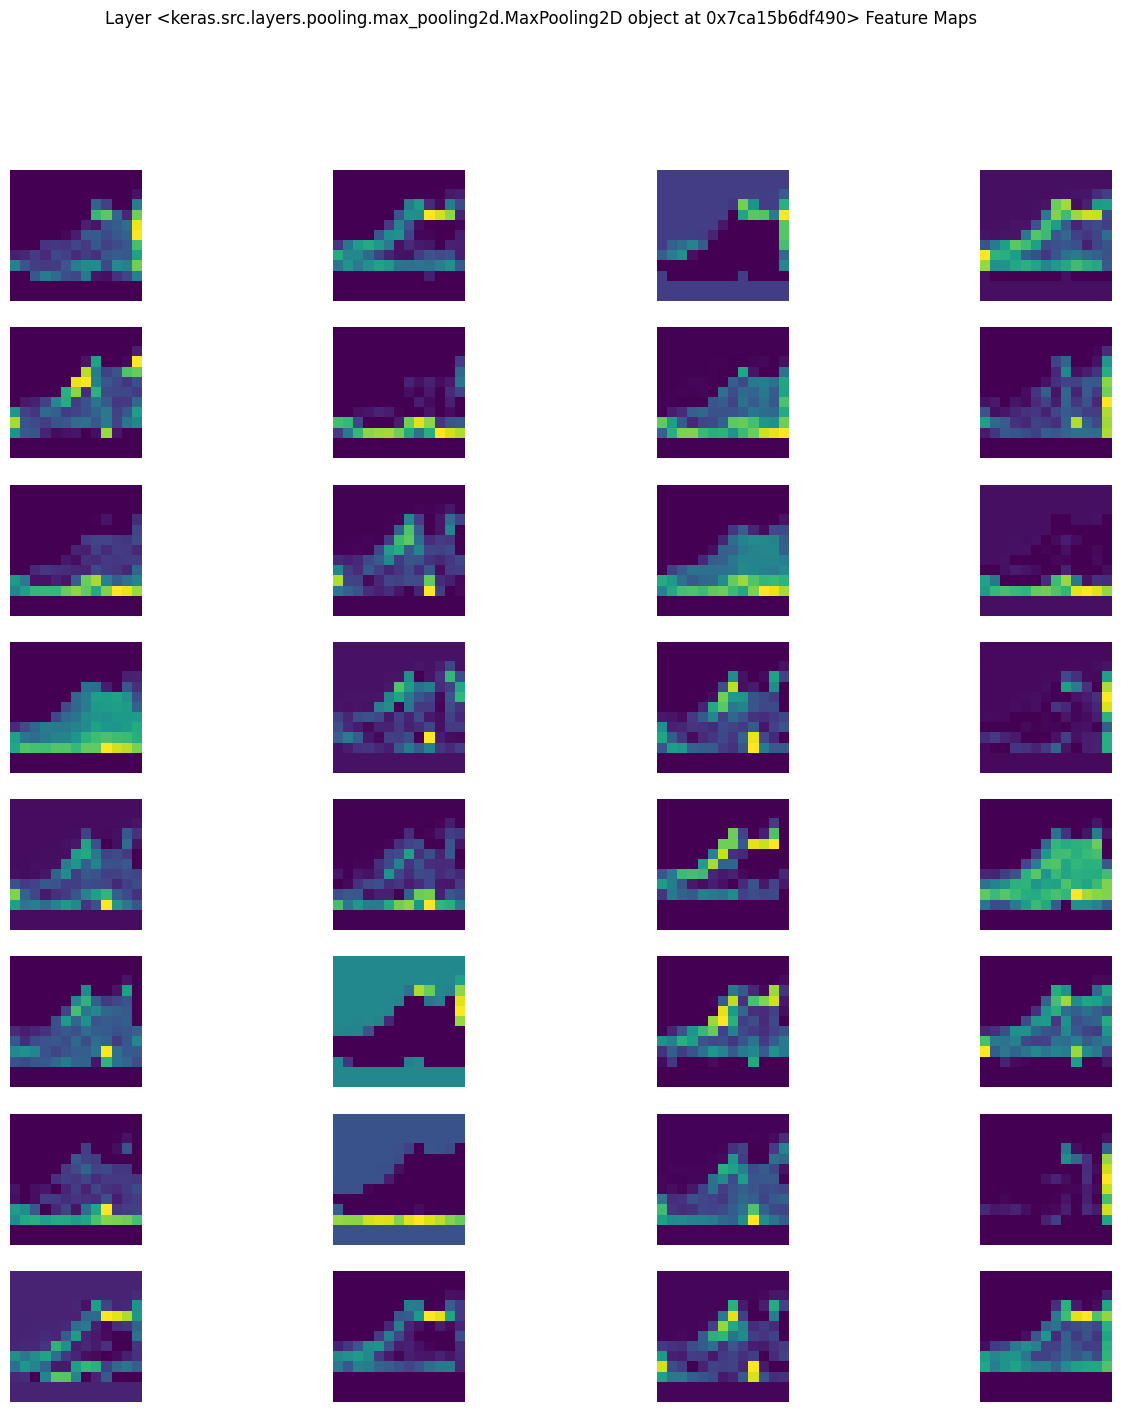

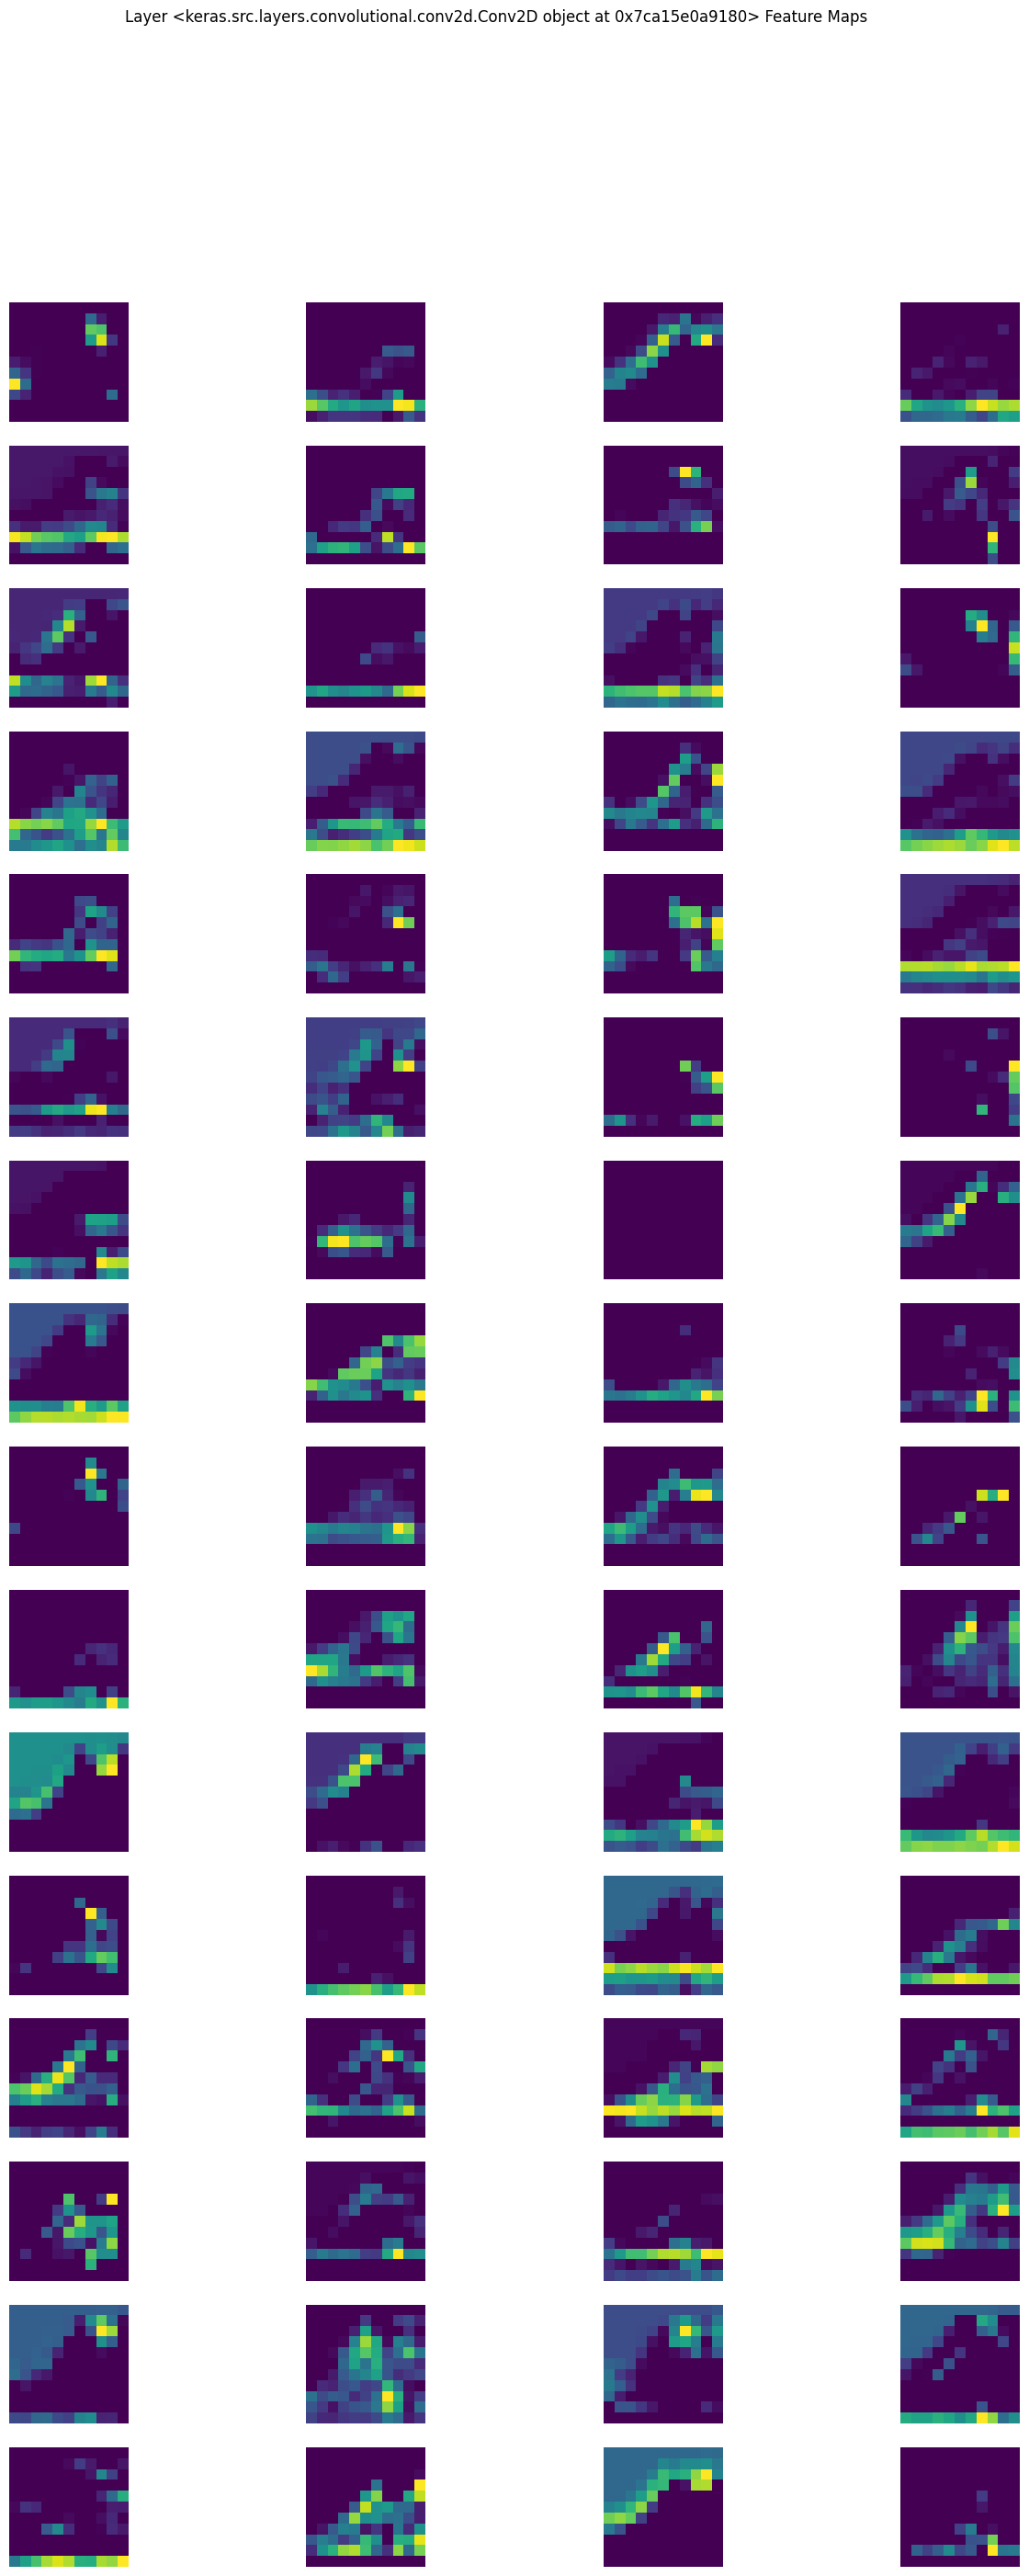

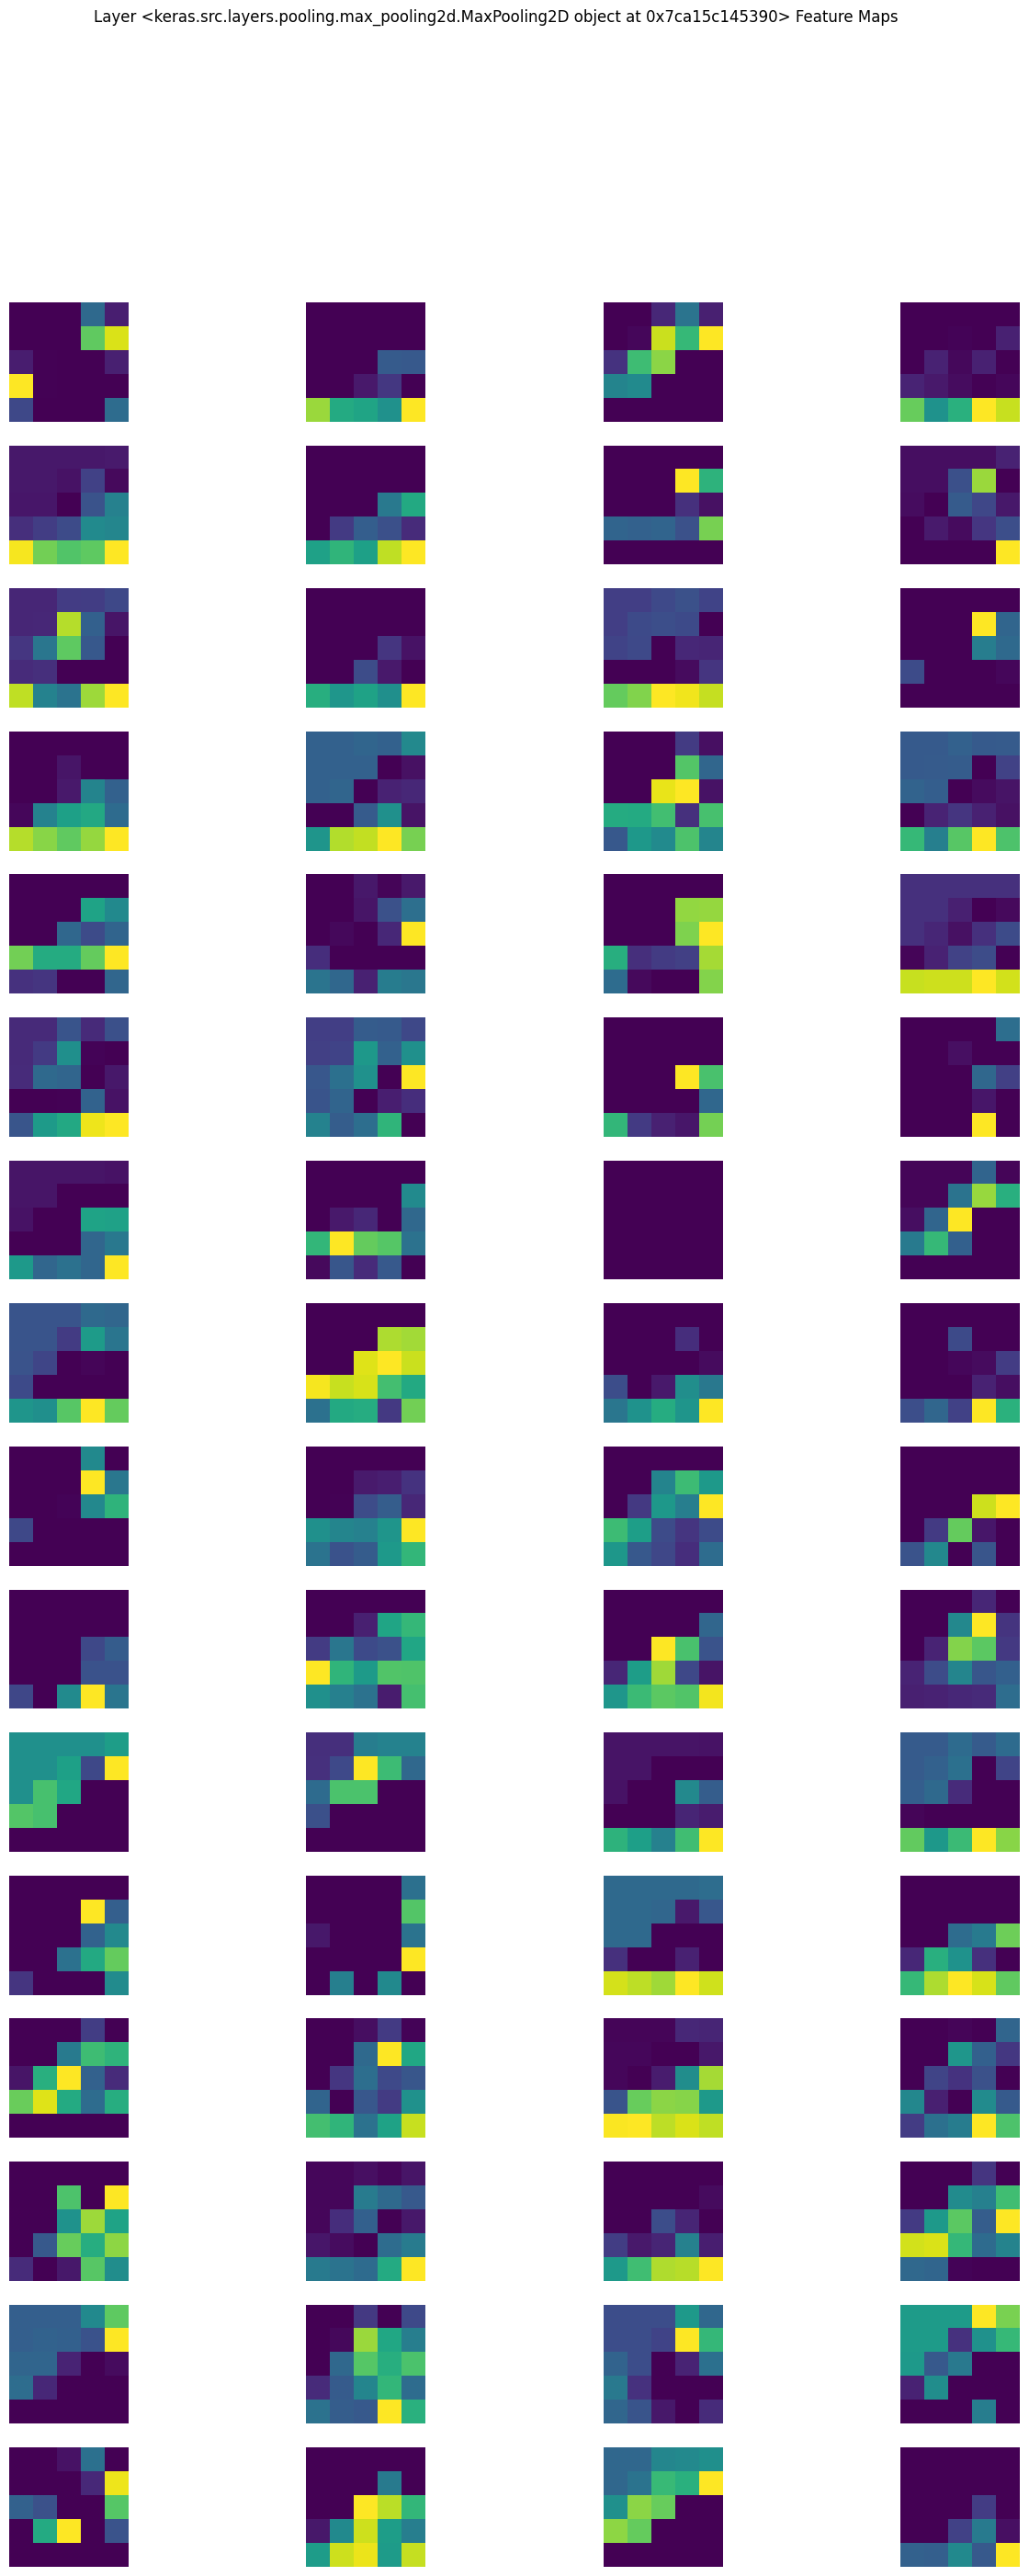

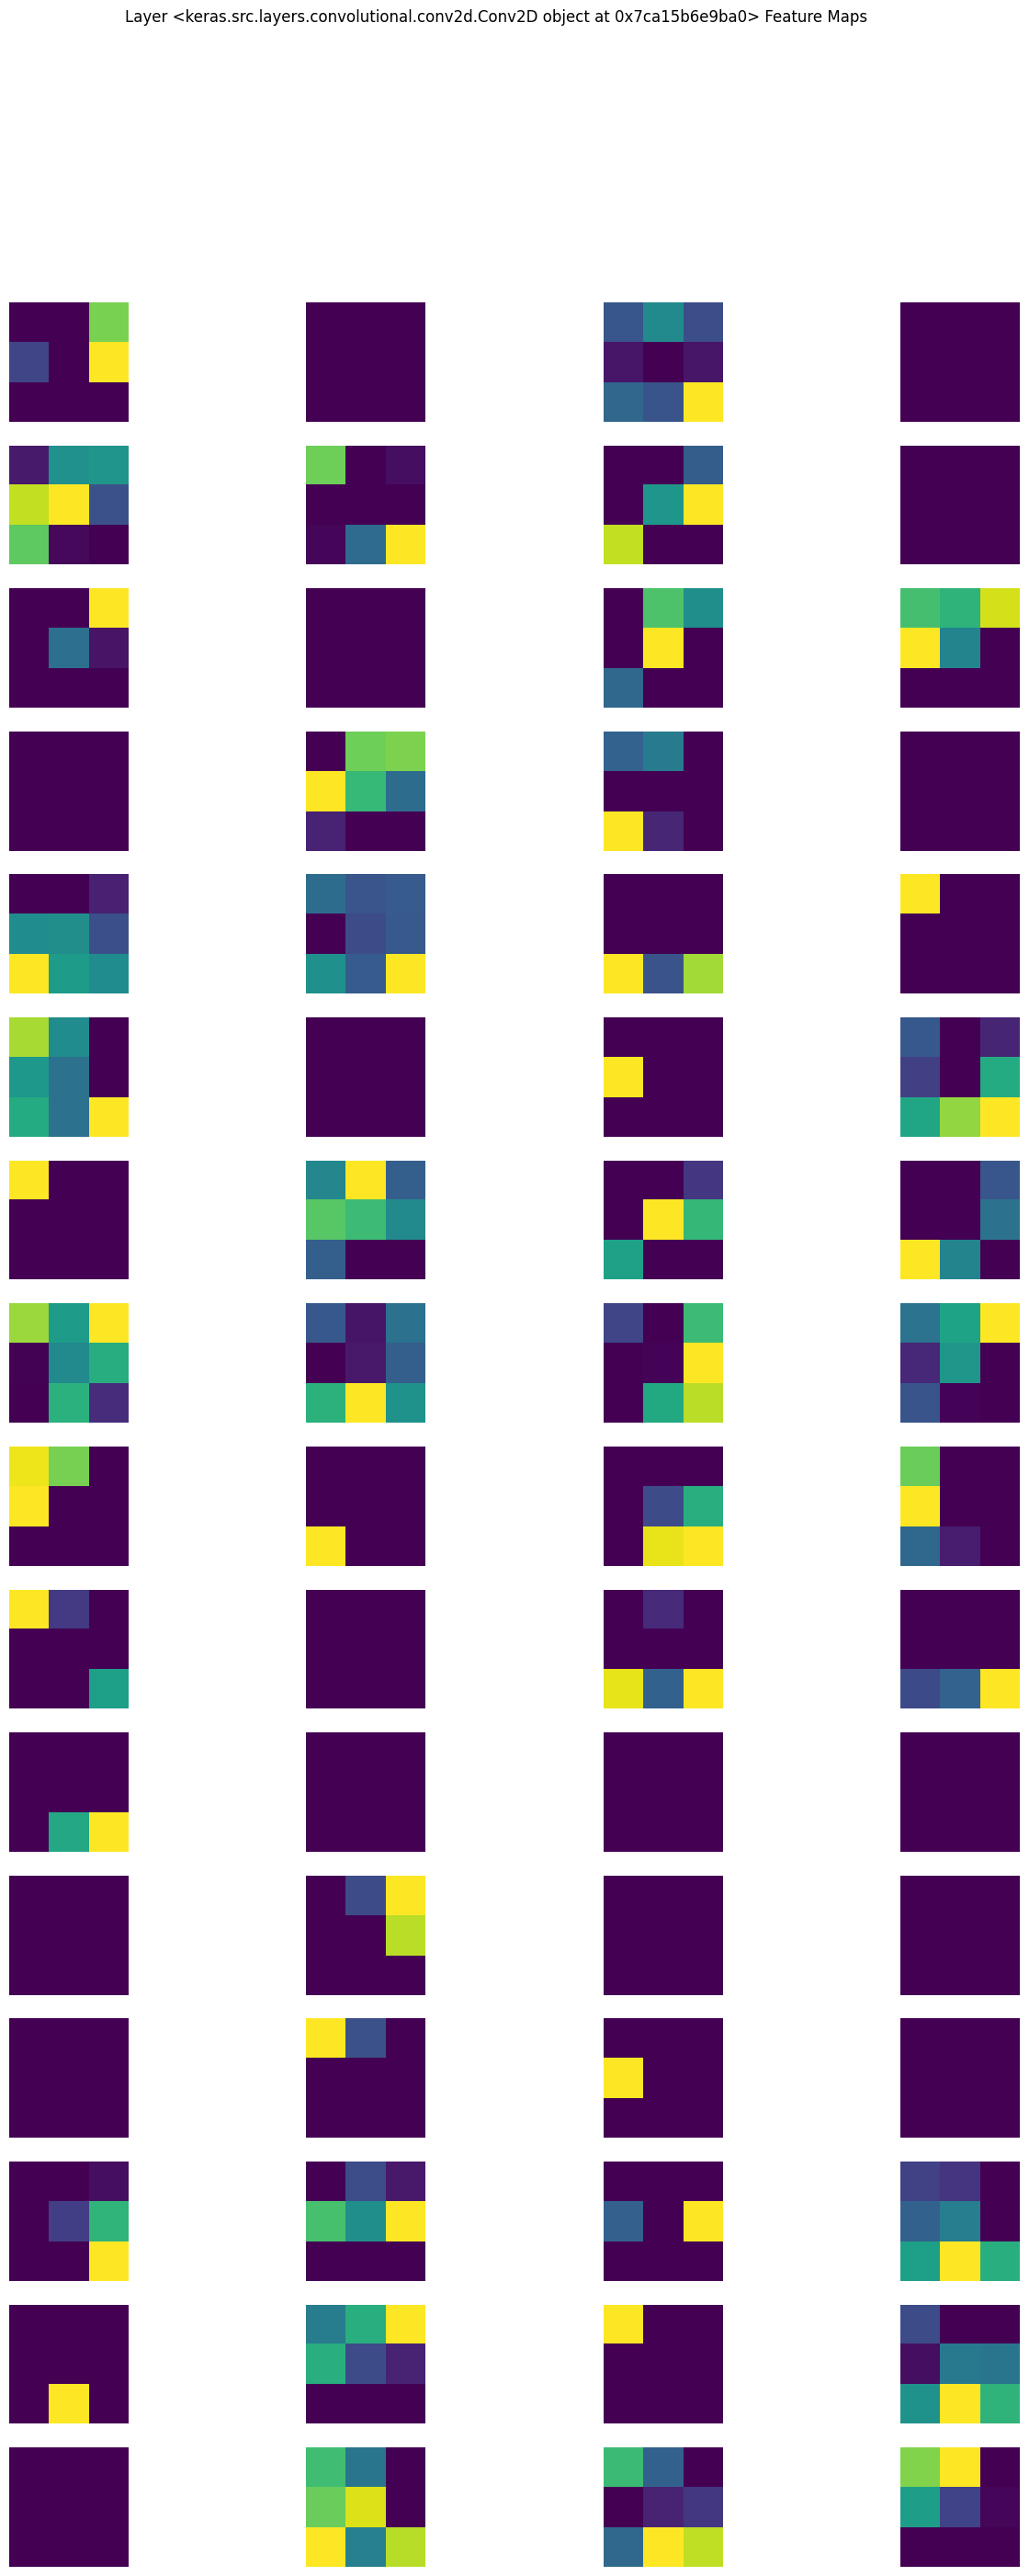

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Передача вхідного зображення через модель та отримання feature maps для кожного шару
activation_model = Model(inputs=model_CNN.input,
                         outputs=[layer.output for layer in model_CNN.layers])
activations = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))

# Візуалізація feature maps для кожного шару
for layer_index, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:  # Якщо це згортковий шар
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        rows = num_features // 4  # Змінено з 8 на 4, оскільки менше фільтрів
        cols = 4

        plt.figure(figsize=(16, 2 * rows))
        for i in range(num_features):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Layer {activation_model.layers[layer_index+1]} Feature Maps')
        plt.show()